### Escuela Politécnica Nacional ###

**Nombre:** Marco Marcillo

**Tema:** [Tarea 06] Serie de Taylor y Polinomios de Lagrange

**Repositorio GIT:** https://github.com/Alejandro0122/MN_PERSONAL


<span style="color:red">

CONJUNTO DE EJERCICIOS


### Determine el orden de la mejor aproximación para las siguientes funciones, usando la Serie de Taylor y el Polinomio de Lagrange:

$$ x_n = \frac{1}{25x^2 + 1}  , x_n = 0 $$

$$ arctanx, x_0 = 1 $$

- Escriba las fórmulas de los diferentes polinomios
- Grafique las diferentes aproximaciones



In [5]:
import sys
print(sys.executable)
print(sys.path)


c:\Users\CORE I5\AppData\Local\Programs\Python\Python313\python.exe
['c:\\Users\\CORE I5\\AppData\\Local\\Programs\\Python\\Python313\\python313.zip', 'c:\\Users\\CORE I5\\AppData\\Local\\Programs\\Python\\Python313\\DLLs', 'c:\\Users\\CORE I5\\AppData\\Local\\Programs\\Python\\Python313\\Lib', 'c:\\Users\\CORE I5\\AppData\\Local\\Programs\\Python\\Python313', '', 'C:\\Users\\CORE I5\\AppData\\Roaming\\Python\\Python313\\site-packages', 'c:\\Users\\CORE I5\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages', 'c:\\Users\\CORE I5\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\win32', 'c:\\Users\\CORE I5\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\CORE I5\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\Pythonwin']


IndexError: list index out of range

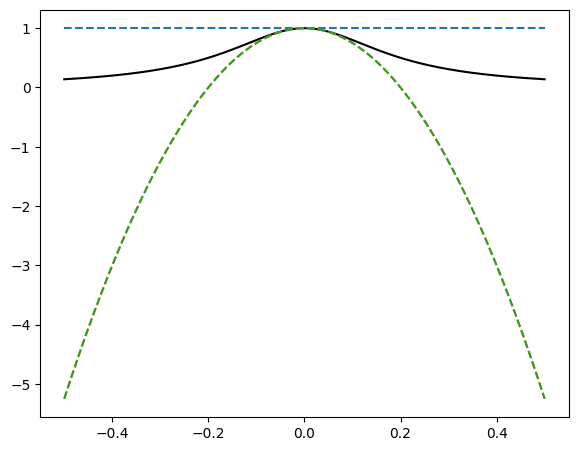

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial # Para calcular n!

# --- Función para calcular el polinomio de Taylor ---
def taylor_series(func, derivatives, x0, order, x_vals):
    """
    Calcula el polinomio de Taylor de una función de un orden dado.

    Args:
        func: La función original f(x).
        derivatives: Una lista de funciones que representan las derivadas de f(x).
        derivatives[0] es la primera derivada, derivatives[1] la segunda, etc.
        x0: El punto alrededor del cual se expande la serie.
        order: El orden del polinomio de Taylor.
        x_vals: Valores de x para los que se evaluará el polinomio.

    Returns:
        Un array numpy con los valores del polinomio de Taylor para x_vals.
    """
    taylor_poly = np.zeros_like(x_vals, dtype=float)
    taylor_poly += func(x0) # Primer término f(x0)

    for n in range(1, order + 1):
        # f^(n)(x0) / n! * (x - x0)^n
        coeff = derivatives[n - 1](x0) / factorial(n)
        taylor_poly += coeff * (x_vals - x0)**n
    return taylor_poly

# --- Funciones y sus Derivadas ---

# 1. f(x) = 1 / (25x^2 + 1), x0 = 0
def f1(x): return 1 / (25 * x**2 + 1)
def df1_1(x): return -50 * x / ((25 * x**2 + 1)**2)
def df1_2(x): return (2500 * x**2 - 50) / ((25 * x**2 + 1)**3)
def df1_3(x): return (-250000 * x**3 + 15000 * x) / ((25 * x**2 + 1)**4)
# Note: Computing higher order derivatives manually can be tedious.
# For illustration, we'll use a few, but for very high orders,
# symbolic differentiation libraries (like SymPy) are preferred.
derivatives_f1 = [df1_1, df1_2, df1_3] # Add more if you want higher orders

# 2. f(x) = arctan(x), x0 = 1
def f2(x): return np.arctan(x)
def df2_1(x): return 1 / (x**2 + 1)
def df2_2(x): return -2 * x / ((x**2 + 1)**2)
def df2_3(x): return (6 * x**2 - 2) / ((x**2 + 1)**3)
derivatives_f2 = [df2_1, df2_2, df2_3] # Add more if you want higher orders

# 3. f(x) = cos(x), x0 = 0
def f3(x): return np.cos(x)
def df3_1(x): return -np.sin(x)
def df3_2(x): return -np.cos(x)
def df3_3(x): return np.sin(x)
def df3_4(x): return np.cos(x)
derivatives_f3 = [df3_1, df3_2, df3_3, df3_4] # Cosine derivatives repeat every 4 orders

# 4. f(x) = 1 / (1-x), x0 = 0
# This is a geometric series sum(x^n from n=0 to inf)
# f(x) = (1-x)^-1
def f4(x): return 1 / (1 - x)
def df4_1(x): return 1 / ((1 - x)**2)
def df4_2(x): return 2 / ((1 - x)**3)
def df4_3(x): return 6 / ((1 - x)**4)
def df4_4(x): return 24 / ((1 - x)**5)
derivatives_f4 = [df4_1, df4_2, df4_3, df4_4]

# 5. f(x) = ln(x), x0 = 1
def f5(x): return np.log(x)
def df5_1(x): return 1 / x
def df5_2(x): return -1 / (x**2)
def df5_3(x): return 2 / (x**3)
def df5_4(x): return -6 / (x**4)
derivatives_f5 = [df5_1, df5_2, df5_3, df5_4]

# --- Graficar Series de Taylor ---

plt.figure(figsize=(15, 18))

# Caso 1: f(x) = 1 / (25x^2 + 1), x0 = 0
x_vals_1 = np.linspace(-0.5, 0.5, 400)
plt.subplot(3, 2, 1)
plt.plot(x_vals_1, f1(x_vals_1), label='f(x) = 1 / (25x^2 + 1)', color='black')
for order in range(1, len(derivatives_f1) + 2): # Test up to the available derivatives + 1 for f(x0)
    if order == 0: continue # Handled by f(x0)
    if order > len(derivatives_f1) + 1: continue # Stop at computed derivatives
    taylor_approx = taylor_series(f1, derivatives_f1, 0, order, x_vals_1)
    plt.plot(x_vals_1, taylor_approx, linestyle='--', label=f'Orden {order}')
plt.title('Serie de Taylor para f(x) = 1 / (25x^2 + 1) en x0 = 0')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axvline(0, color='gray', linestyle=':', linewidth=0.8)
plt.legend()
plt.grid(True)


# Caso 2: f(x) = arctan(x), x0 = 1
x_vals_2 = np.linspace(0, 2, 400)
plt.subplot(3, 2, 2)
plt.plot(x_vals_2, f2(x_vals_2), label='f(x) = arctan(x)', color='black')
for order in range(1, len(derivatives_f2) + 2):
    if order == 0: continue
    if order > len(derivatives_f2) + 1: continue
    taylor_approx = taylor_series(f2, derivatives_f2, 1, order, x_vals_2)
    plt.plot(x_vals_2, taylor_approx, linestyle='--', label=f'Orden {order}')
plt.title('Serie de Taylor para f(x) = arctan(x) en x0 = 1')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axvline(1, color='gray', linestyle=':', linewidth=0.8)
plt.legend()
plt.grid(True)


# Caso 3: f(x) = cos(x), x0 = 0
x_vals_3 = np.linspace(-2*np.pi, 2*np.pi, 400)
plt.subplot(3, 2, 3)
plt.plot(x_vals_3, f3(x_vals_3), label='f(x) = cos(x)', color='black')
for order in [0, 2, 4, 6]: # Solo órdenes pares para cos(x) en x0=0
    # cos(x) = 1 - x^2/2! + x^4/4! - x^6/6! + ...
    # Los coeficientes de derivadas impares en x0=0 son 0
    taylor_approx = taylor_series(f3, derivatives_f3, 0, order, x_vals_3)
    plt.plot(x_vals_3, taylor_approx, linestyle='--', label=f'Orden {order}')
plt.title('Serie de Taylor para f(x) = cos(x) en x0 = 0')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axvline(0, color='gray', linestyle=':', linewidth=0.8)
plt.legend()
plt.grid(True)


# Caso 4: f(x) = 1 / (1-x), x0 = 0
x_vals_4 = np.linspace(-0.8, 0.8, 400) # El radio de convergencia es |x| < 1
plt.subplot(3, 2, 4)
plt.plot(x_vals_4, f4(x_vals_4), label='f(x) = 1 / (1-x)', color='black')
for order in range(1, len(derivatives_f4) + 2):
    if order == 0: continue
    if order > len(derivatives_f4) + 1: continue
    taylor_approx = taylor_series(f4, derivatives_f4, 0, order, x_vals_4)
    plt.plot(x_vals_4, taylor_approx, linestyle='--', label=f'Orden {order}')
plt.title('Serie de Taylor para f(x) = 1 / (1-x) en x0 = 0')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axvline(0, color='gray', linestyle=':', linewidth=0.8)
plt.legend()
plt.grid(True)


# Caso 5: f(x) = ln(x), x0 = 1
x_vals_5 = np.linspace(0.1, 2.5, 400)
plt.subplot(3, 2, 5)
plt.plot(x_vals_5, f5(x_vals_5), label='f(x) = ln(x)', color='black')
for order in range(1, len(derivatives_f5) + 2):
    if order == 0: continue
    if order > len(derivatives_f5) + 1: continue
    taylor_approx = taylor_series(f5, derivatives_f5, 1, order, x_vals_5)
    plt.plot(x_vals_5, taylor_approx, linestyle='--', label=f'Orden {order}')
plt.title('Serie de Taylor para f(x) = ln(x) en x0 = 1')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axvline(1, color='gray', linestyle=':', linewidth=0.8)
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

### Polinomios de Lagrange

--- Polinomios de Lagrange ---
Conjunto A (4 puntos): Grado del Polinomio = 3
Polinomio: (1/10000)*x^3 + (8/1069)*x^2 - (1213/8032)*x^1

Conjunto B (3 puntos): Grado del Polinomio = 2
Polinomio: (1/2)*x^2 + (5/2)*x^1 - 1

Conjunto C (4 puntos): Grado del Polinomio = 3
Polinomio: (43/1080)*x^3 + (101/540)*x^2 + (793/1080)*x^1 + (1087/180)



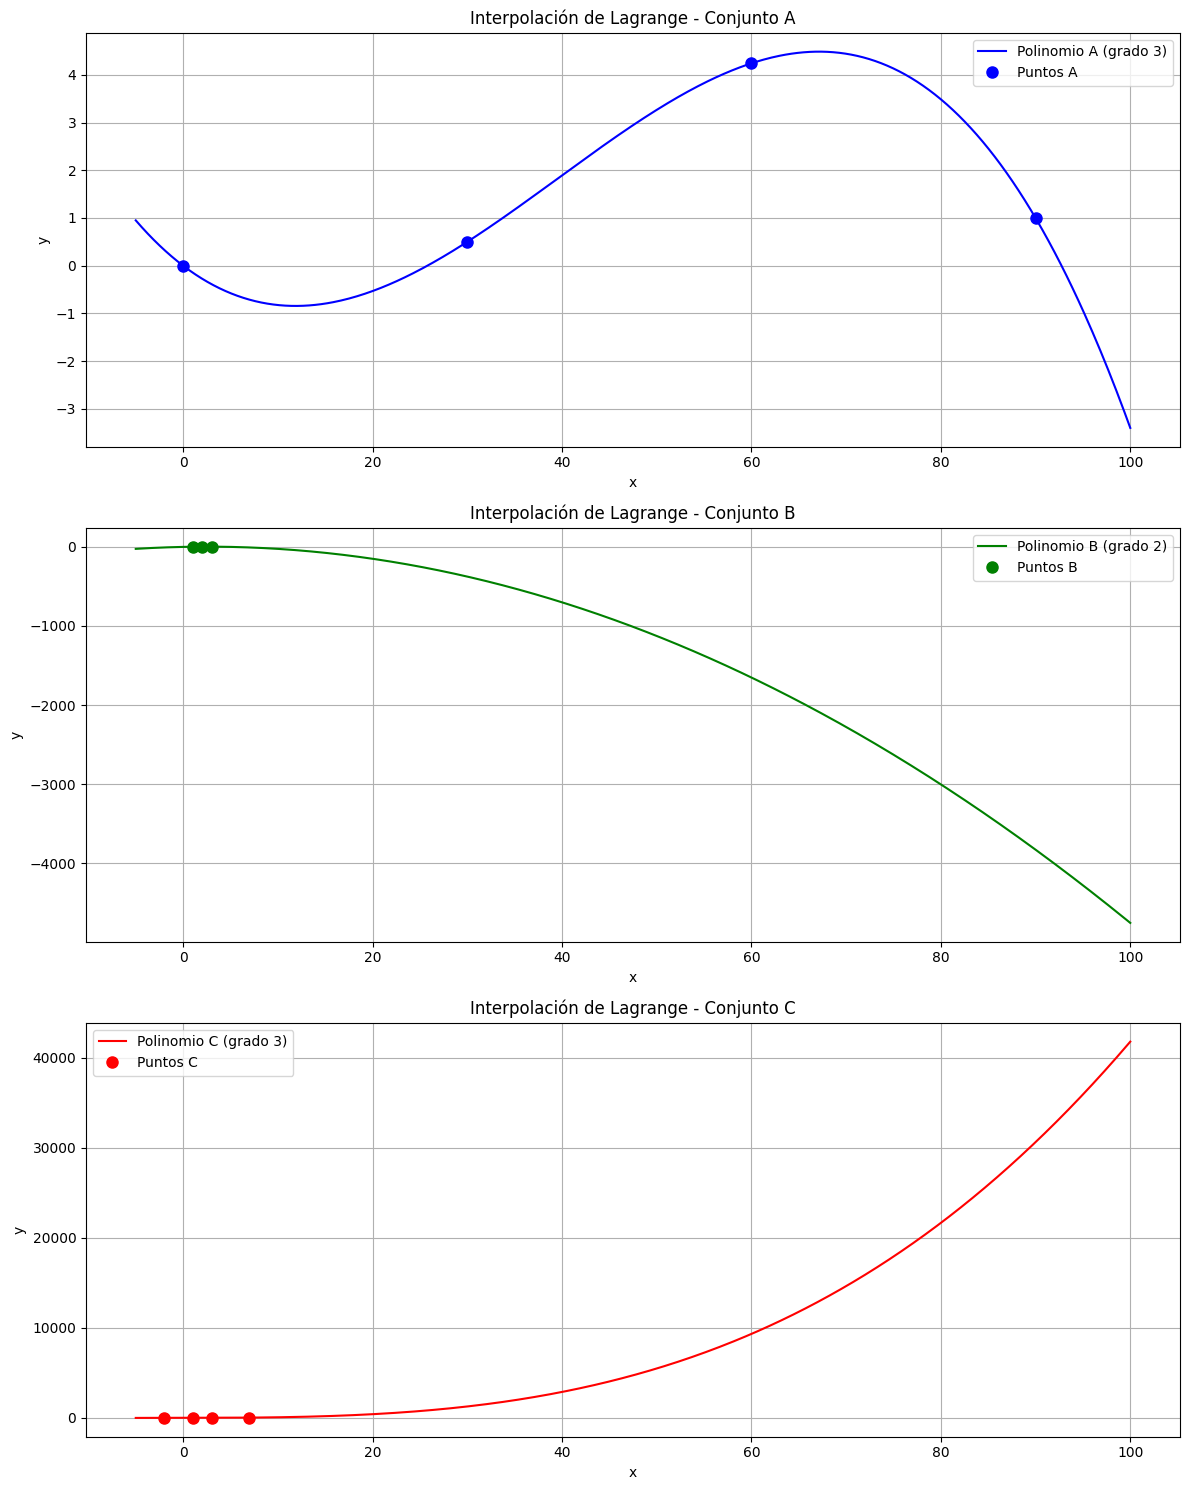

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from fractions import Fraction # Para mostrar coeficientes como fracciones

def format_polynomial_fraction(poly):
    coeffs = np.poly1d(poly).coeffs
    degree = len(coeffs) - 1
    polynomial_str = ""
    for i, coeff in enumerate(coeffs):
        power = degree - i
        fraction_coeff = Fraction(coeff).limit_denominator(10000) # Limitar denominador para fracciones más manejables
        if abs(float(fraction_coeff)) > 1e-9: # Usar float(fraction_coeff) para verificar si es casi cero
            if polynomial_str:
                polynomial_str += " + " if fraction_coeff > 0 else " - "
            abs_fraction = abs(fraction_coeff)
            if abs_fraction == 1 and power > 0:
                polynomial_str += f"x^{power}"
            elif abs_fraction == 1 and power == 0:
                polynomial_str += f"1"
            elif abs_fraction == 0: # Evitar mostrar (0)*x^n
                continue
            else:
                polynomial_str += f"({abs_fraction})*x^{power}" if power > 0 else f"({abs_fraction})"
    return polynomial_str.replace("+ -", "- ").strip() # Eliminar espacios extra al inicio/fin

# === Conjunto A ===
x_a = np.array([0, 30, 60, 90])
y_a = np.array([0, 0.5, 3 * np.sqrt(2), 1])
poly_a = lagrange(x_a, y_a)
degree_a = len(x_a) - 1

# === Conjunto B ===
x_b = np.array([1, 2, 3])
y_b = np.array([1, 2, 2])
poly_b = lagrange(x_b, y_b)
degree_b = len(x_b) - 1

# === Conjunto C ===
x_c = np.array([-2, 1, 3, 7])
y_c = np.array([5, 7, 11, 34])
poly_c = lagrange(x_c, y_c)
degree_c = len(x_c) - 1

# === Mostrar polinomios y sus grados ===
print("--- Polinomios de Lagrange ---")
print(f"Conjunto A (4 puntos): Grado del Polinomio = {degree_a}")
print(f"Polinomio: {format_polynomial_fraction(poly_a)}\n")

print(f"Conjunto B (3 puntos): Grado del Polinomio = {degree_b}")
print(f"Polinomio: {format_polynomial_fraction(poly_b)}\n")

print(f"Conjunto C (4 puntos): Grado del Polinomio = {degree_c}")
print(f"Polinomio: {format_polynomial_fraction(poly_c)}\n")

# === Graficar Polinomios de Lagrange ===
x_vals_plot = np.linspace(-5, 100, 500)

plt.figure(figsize=(12, 15))

# Gráfica A
plt.subplot(3, 1, 1)
plt.plot(x_vals_plot, poly_a(x_vals_plot), label=f'Polinomio A (grado {degree_a})', color='blue')
plt.plot(x_a, y_a, 'bo', markersize=8, label='Puntos A')
plt.title('Interpolación de Lagrange - Conjunto A')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Gráfica B
plt.subplot(3, 1, 2)
plt.plot(x_vals_plot, poly_b(x_vals_plot), label=f'Polinomio B (grado {degree_b})', color='green')
plt.plot(x_b, y_b, 'go', markersize=8, label='Puntos B')
plt.title('Interpolación de Lagrange - Conjunto B')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Gráfica C
plt.subplot(3, 1, 3)
plt.plot(x_vals_plot, poly_c(x_vals_plot), label=f'Polinomio C (grado {degree_c})', color='red')
plt.plot(x_c, y_c, 'ro', markersize=8, label='Puntos C')
plt.title('Interpolación de Lagrange - Conjunto C')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()